# Customer segmentation using clustering algorithms

My unsupervised learning idea is to use [The Mall](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv) dataset from Kaggle to perform customer segmentation using clustering algorithms. This dataset includes features like customer ID, age, gender, annual income, and spending score. Here’s a breakdown of the project idea:

Goal: Customer Segmentation

My goal is to segment customers into distinct groups based on similar characteristics, particularly their buying patterns and demographics. This segmentation could be useful for targeted marketing, personalized offers, and overall customer relationship management strategies, like store layout optimization. 

Here is my overall approach

### Inspection, Analysis, and Data Preprocessing:
First I will visualize the distributions of key numerical features to identify any skewness or unusual patterns using histograms and box plots. Next I will use feature selection and scaling with a focus on relevant features, such as annual income and spending score, which provide insights into the financial and spending behavior of customers. Next, I will check and address any missing data to ensure the clustering algorithms perform optimally.  Finally, I will standardize or normalize these features to improve the performance of distance-based clustering algorithms.

### Clustering Algorithms:
**K-Means Clustering:** I will use K-Means to create clusters based on Euclidean distance, grouping similar customers. I will use automated means to determine the optimal number of clusters using the elbow method or silhouette score.

**Agglomerative Clustering**: to evaluate the robustness of K-Means, I'll compare it with another clustering algorithm, Agglomerative Clustering. Unlike K-Means, Agglomerative Clustering does not require the number of clusters as a parameter upfront, and it can reveal hierarchical relationships.

### Cluster Analysis:
Profiling Clusters: After clustering,  I will analyze the characteristics of each approach and segment. For example, clusters may represent "High Income, High Spending," "Low Income, Low Spending," or "Young Customers with High Spending." Profiling in this way will allow for a better understanding of each group’s behavior and can guide business decisions.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Initial inspection
- Describe the columns (features) available in the dataset and their data types.
- Obtain basic statistics of numeric columns to understand the range, mean, and other characteristics of the features.


In [17]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Visualization, Distribution Analysis and Cleaning
Here I will visualize the distributions of key numerical features to identify any skewness or unusual patterns, and explore the distribution of the categorical features to understand the sample composition. I also create scatter plots to visually assess any relationships between pairs of features such as Annual Income vs. Spending Score and Age vs. Spending Score. I will also inspect if there are any missing values in the dataset. Given that Annual Income has a larger range than Spending Score, standardization or normalization would be beneficial for k-means clustering The box plots and age distributions below show no outliners, so my cleaning step will not require any methods to deal with outliners

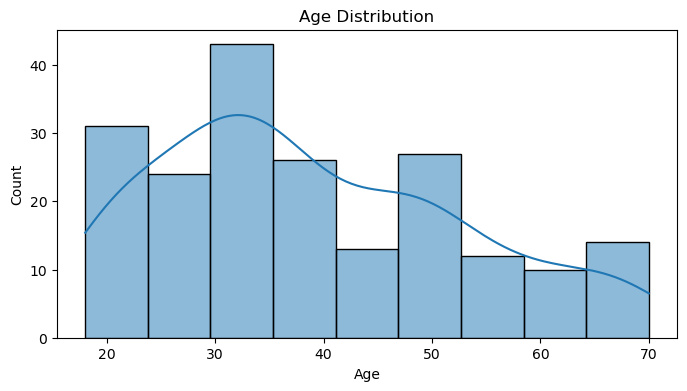

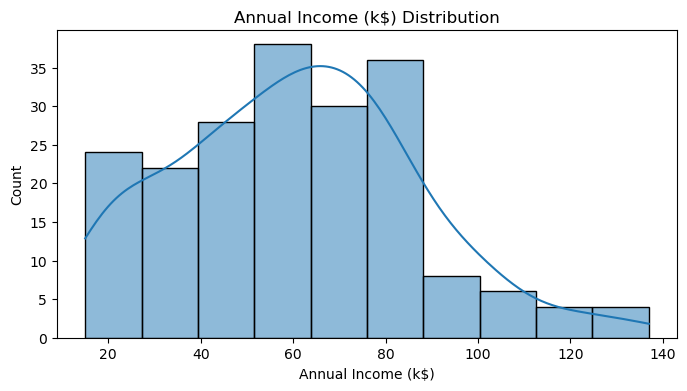

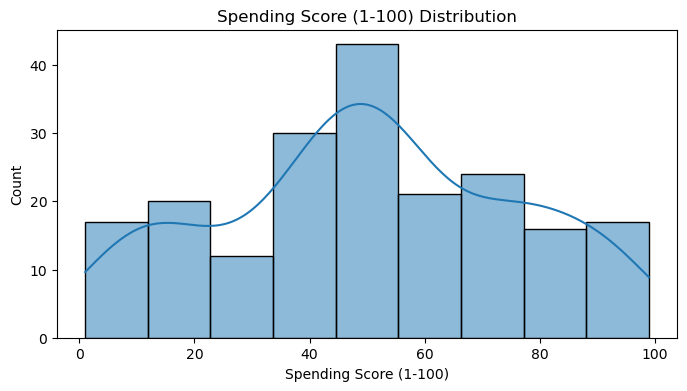

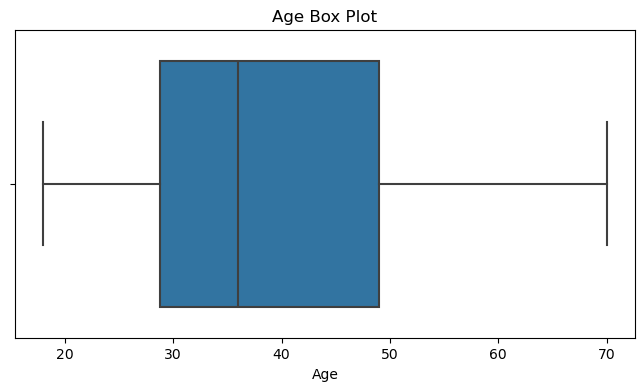

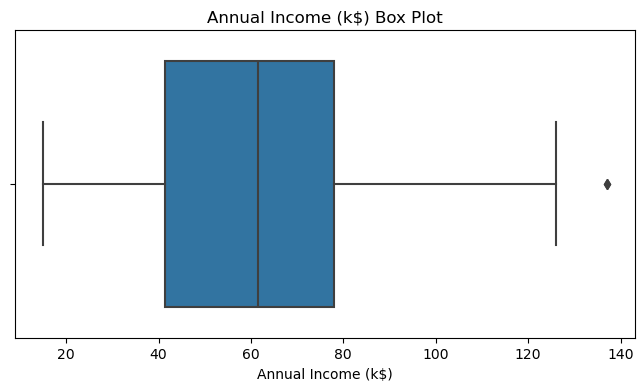

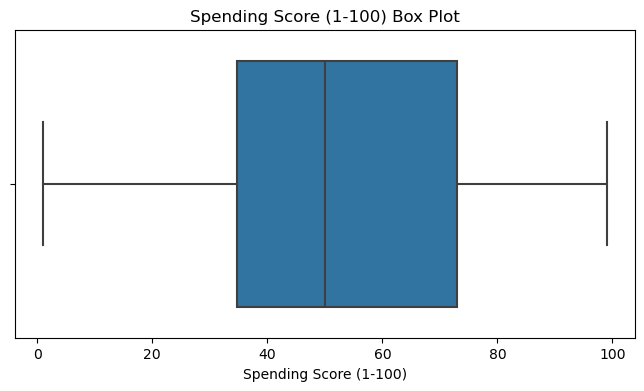

In [30]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()

# Boxplots to identify potential outliers
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} Box Plot')
    plt.show()

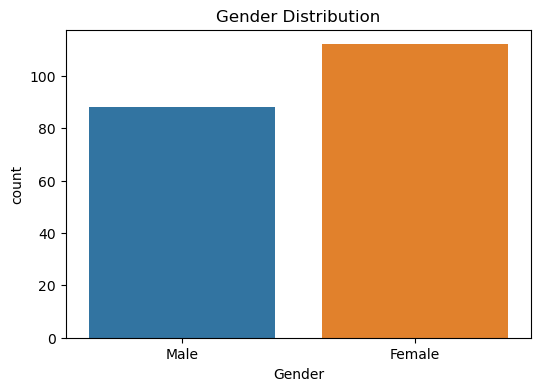

In [31]:
# Plot the count of each gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

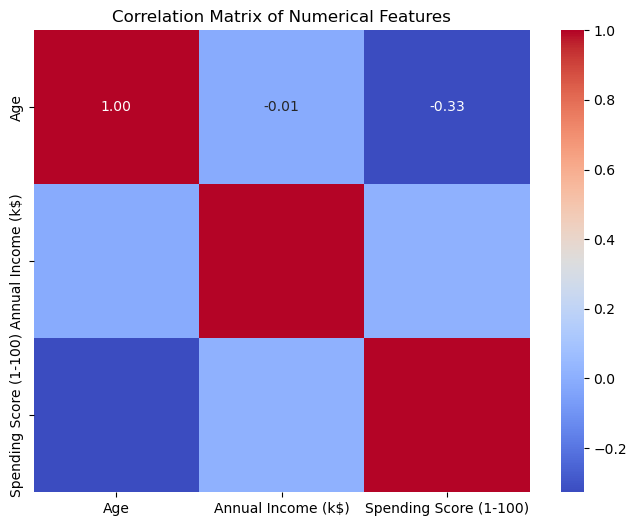

In [33]:
'''
The correlation matrix shows that there are no linearly correlated pairs of variables,
so clustering may be a good choice
'''

# Correlation matrix
correlation_matrix = df[features].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

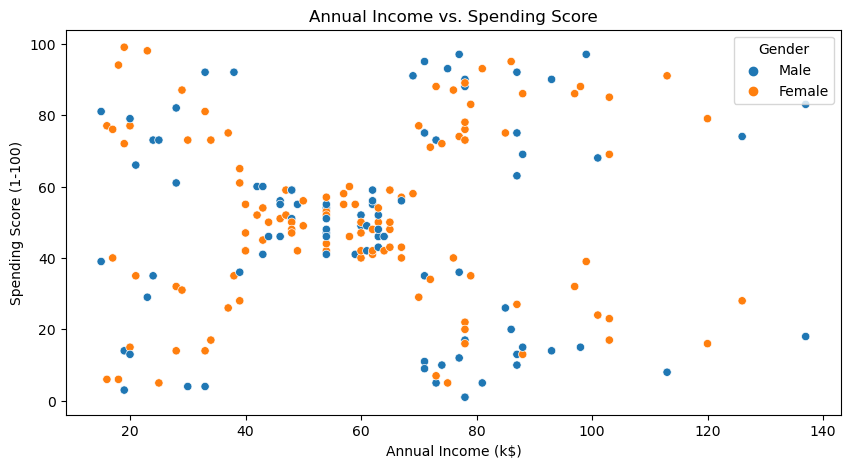

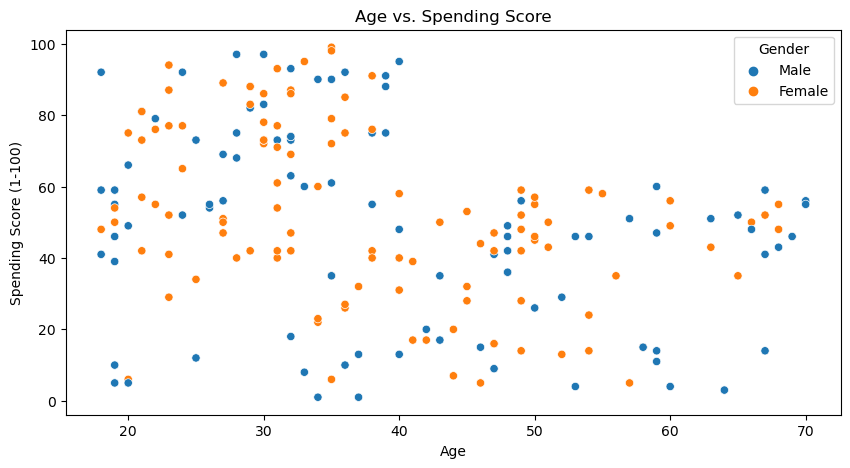

In [23]:
'''
The lack of a clear linear trend between Annual Income and Spending Score reinforces the earlier 
observation from the correlation matrix. There appear to be groups of data points based on
income and spending patterns
'''
# Scatter plots
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs. Spending Score')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age vs. Spending Score')
plt.show()


In [24]:
## Clean the data
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [26]:
'''The data is clean so no additional cleaning is needed. I am going to scale the numerical features
as part of data cleaning and prep. Annual Income has a larger range than Spending Score,
standardization or normalization will be beneficial.'''
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Selecting relevant features
df_selected = df[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Encode 'Gender' as a numerical value
label_encoder = LabelEncoder()
df_selected['Gender'] = label_encoder.fit_transform(df_selected['Gender'])

# Scale the features to improve clustering performance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

## Perform Analysis Using Unsupervised Learning Models

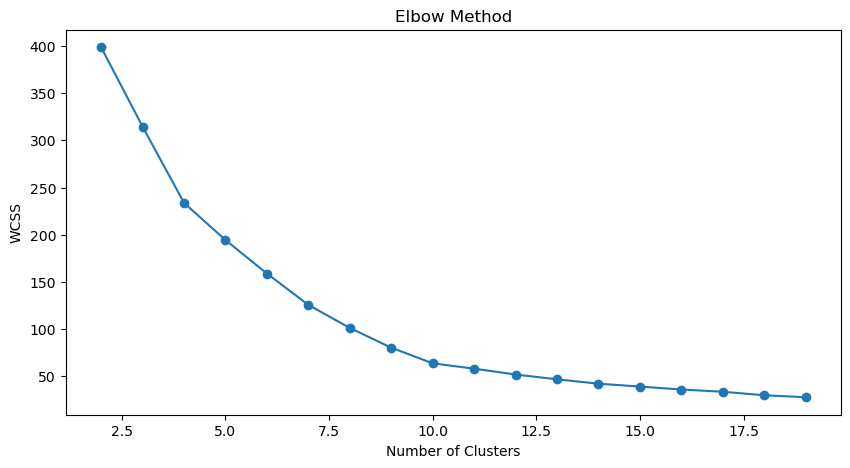

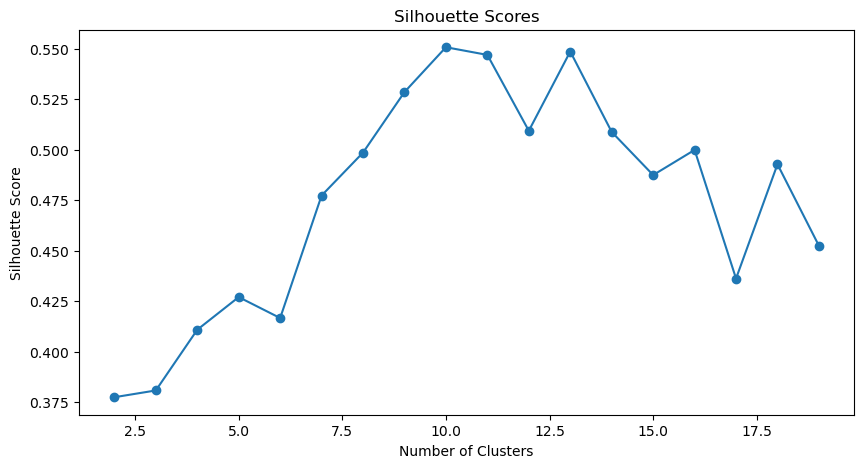

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow method to determine optimal number of clusters
wcss = []
silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot WCSS for elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(2,20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

The optimal K looks to be around 10. We will consider K our optimal cluster and train our model with K=10

In [28]:
'''Hyperparameter Optimization: For K-Means, we used the elbow method to optimize the number of clusters.
Agglomerative Clustering also required the number of clusters, and a similar approach could be
applied to optimize that choice.
'''
# Train KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

Visualize the clusters

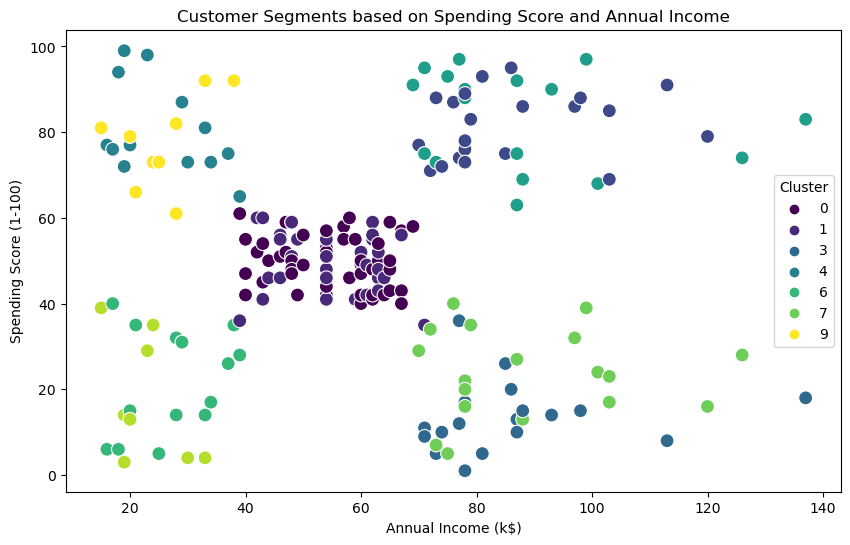

In [29]:
import seaborn as sns

# Plot clusters with Spending Score vs. Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments based on Spending Score and Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Model Comparison

To evaluate the robustness of K-Means, let’s compare it with another clustering algorithm, Agglomerative Clustering. Unlike K-Means, Agglomerative Clustering does not require the number of clusters as a parameter upfront, and it can reveal hierarchical relationships.

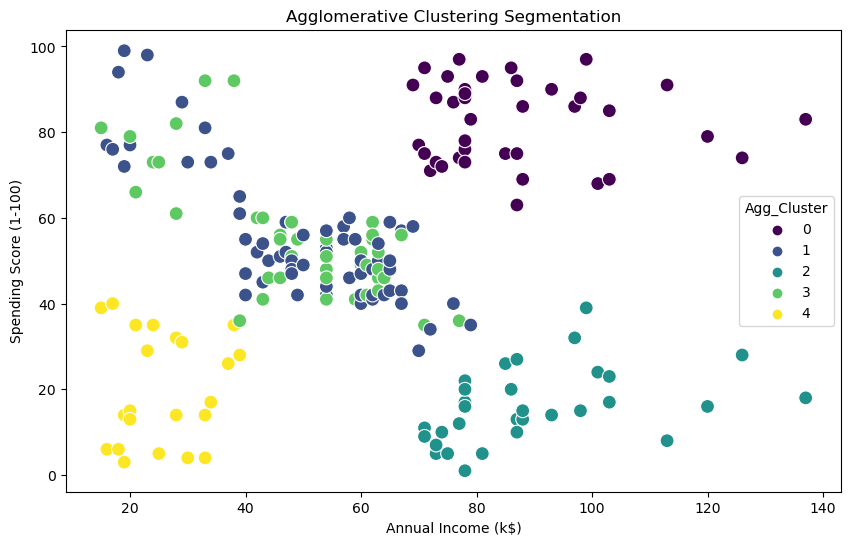

In [46]:
from sklearn.cluster import AgglomerativeClustering

# Train Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=5)
df['Agg_Cluster'] = agg_cluster.fit_predict(df_scaled)

# Visualize Agglomerative Clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agg_Cluster', palette='viridis', s=100)
plt.title('Agglomerative Clustering Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Evaluation and discussion
Step 7: Evaluation and Discussion

**K-Means vs. Agglomerative Clustering:**
K-Means clustering is efficient and easy to implement. It also works well when clusters are spherical and well-separated. However, it may perform poorly if clusters have irregular shapes or if there are outliers.

**Agglomerative Clustering:** This method is more flexible with cluster shapes and can reveal hierarchical relationships, but it is computationally more intensive and less scalable than K-Means. However, it may reveal hierarchical relationships within the data, but its clusters can be less distinct in boundary compared to K-Means, particularly if the data has noise or irregular cluster shapes.

For my purposes, K-Means clustering seems to be the right model to choose. Provides clearer, more distinct clusters for well-separated customer segments, making it ideal for scenarios where each group has similar intra-cluster distances.
    
**Conclusions**
Customer Segmentation: K-Means identified five distinct customer segments based on annual income and spending score, which align well with business objectives for targeted marketing.

Comparison of Clustering Techniques: While both K-Means and Agglomerative Clustering were effective, K-Means was simpler and more efficient, making it preferable for this dataset. However, Agglomerative Clustering could be useful if further hierarchical insights were needed. Each cluster we found provides actionable insights, enabling personalized marketing strategies such as promotions for high-spending customers, engagement efforts for low-income high-spenders, and retention efforts for moderate spenders. By using clustering, we gained valuable insights into customer segments without labeled data, making unsupervised learning a powerful tool for customer analysis in scenarios without predefined categories.